In [ ]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "kshitijapawar04" # username from the json file
os.environ['KAGGLE_KEY'] = "0aa7cef2e777bb6942e03f76600df47e" # key from the json file

!kaggle datasets download sivm205/soybean-diseased-leaf-dataset

Dataset URL: https://www.kaggle.com/datasets/sivm205/soybean-diseased-leaf-dataset
License(s): unknown
 99% 1.91G/1.93G [00:20<00:00, 34.4MB/s]
100% 1.93G/1.93G [00:20<00:00, 98.7MB/s]


In [ ]:
!unzip /content/soybean-diseased-leaf-dataset.zip

Archive:  /content/soybean-diseased-leaf-dataset.zip
  inflating: Mossaic Virus/DSC_0114.jpg  
  inflating: Mossaic Virus/DSC_0127.jpg  
  inflating: Mossaic Virus/DSC_0128.jpg  
  inflating: Mossaic Virus/DSC_0129.jpg  
  inflating: Mossaic Virus/DSC_0130.jpg  
  inflating: Mossaic Virus/DSC_0131.jpg  
  inflating: Mossaic Virus/DSC_0132.jpg  
  inflating: Mossaic Virus/DSC_0133.jpg  
  inflating: Mossaic Virus/DSC_0134.jpg  
  inflating: Mossaic Virus/DSC_0135.jpg  
  inflating: Mossaic Virus/DSC_0136.jpg  
  inflating: Mossaic Virus/DSC_0137.jpg  
  inflating: Mossaic Virus/DSC_0138.jpg  
  inflating: Mossaic Virus/DSC_0139.jpg  
  inflating: Mossaic Virus/DSC_0140.jpg  
  inflating: Mossaic Virus/DSC_0141.jpg  
  inflating: Mossaic Virus/DSC_0142.jpg  
  inflating: Mossaic Virus/DSC_0143.jpg  
  inflating: Mossaic Virus/DSC_0144.jpg  
  inflating: Mossaic Virus/DSC_0145.jpg  
  inflating: Mossaic Virus/DSC_0146.jpg  
  inflating: Mossaic Virus/DSC_0147.jpg  
  inflating: Southern b

In [ ]:
import tensorflow as tf
import zipfile
import os

# Unzip the dataset
zip_path = '/content/soybean-diseased-leaf-dataset.zip'
extract_path = '/content/soybean-diseased-leaf-dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/soybean-diseased-leaf-dataset', output="dataset", seed=1337, ratio=(0.8, 0.1, 0.1))

Copying files: 701 files [00:12, 55.71 files/s]


In [ ]:
train_dir ="/content/dataset/train"
validation_dir="/content/dataset/val"

BATCH_SIZE = 32
IMG_SIZE = (160, 160)
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 557 files belonging to 10 classes.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)
test_dir="/content/dataset/test"
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 67 files belonging to 10 classes.
Found 77 files belonging to 10 classes.


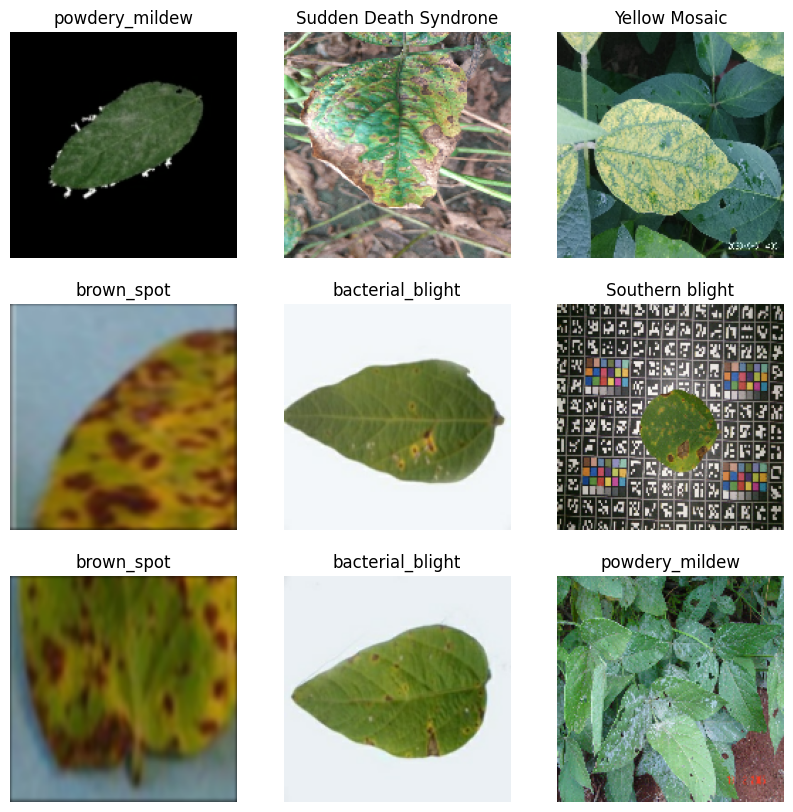

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
class_names

['Mossaic Virus',
 'Southern blight',
 'Sudden Death Syndrone',
 'Yellow Mosaic',
 'bacterial_blight',
 'brown_spot',
 'crestamento',
 'ferrugen',
 'powdery_mildew',
 'septoria']

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

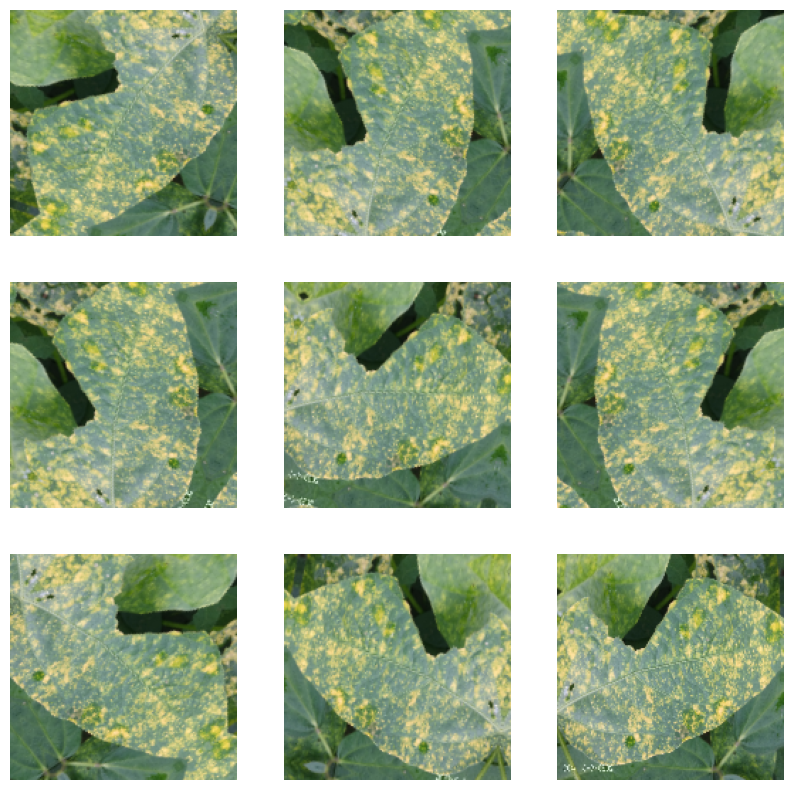

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
preprocess_input=tf.keras.applications.efficientnet.preprocess_input

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model=tf.keras.applications.EfficientNetB4(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet',
)

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1792)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()


Model: "efficientnetb4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 160, 160,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 160, 160,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 160, 160,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 161, 161,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 80, 80,    │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 80, 80,    │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 80, 80,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 80, 80,    │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 80, 80,    │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 80, 80,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 80, 80,    │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 80, 80,    │      1,152 │ block1a_se_excit

 Total params: 17,673,823 (67.42 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17,673,823 (67.42 MB)

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1792)


In [ ]:
prediction_layer = tf.keras.layers.Dense(len(class_names), activation='sigmoid')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 10)


In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb4 (Functional)     │ (None, 5, 5, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        17,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,691,753 (67.49 MB)

 Trainable params: 17,930 (70.04 KB)

 Non-trainable params: 17,673,823 (67.42 MB)

In [ ]:
len(model.trainable_variables)

2

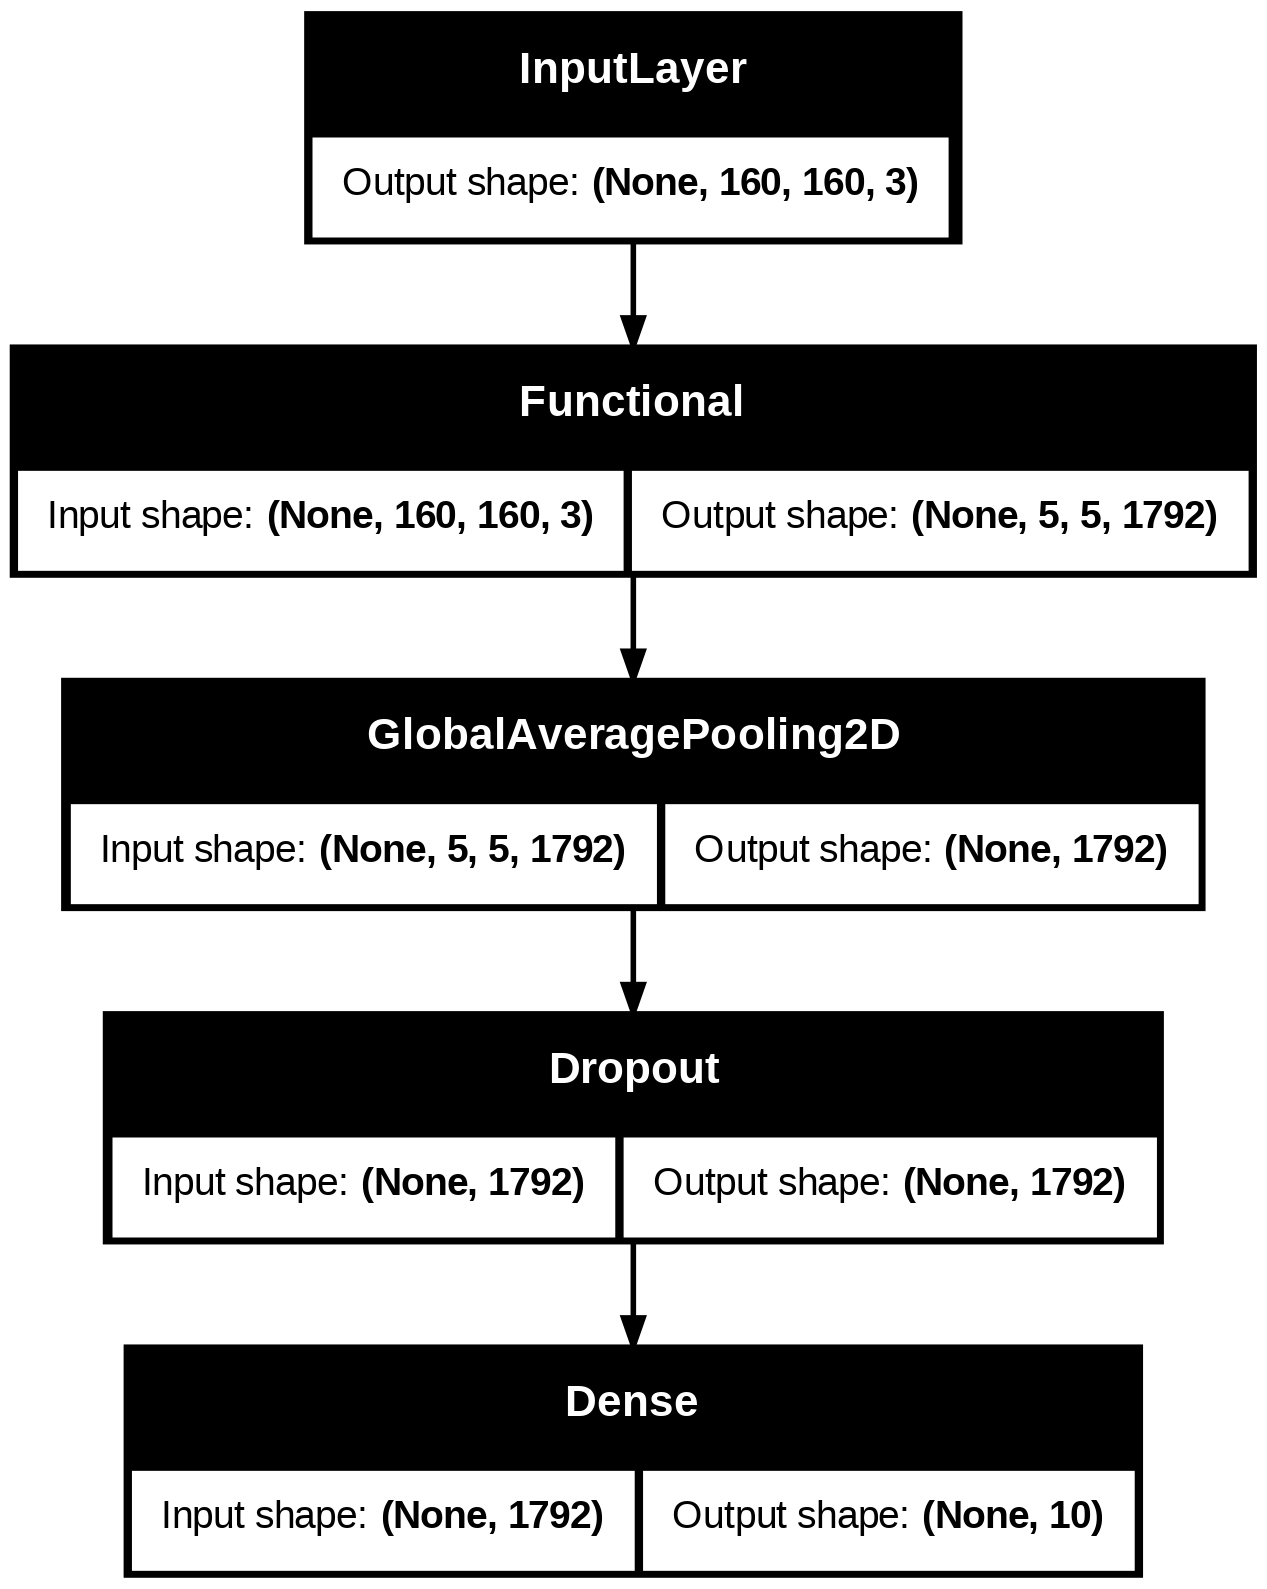

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.0306 - loss: 2.4139


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.41
initial accuracy: 0.03


In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.3802 - loss: 1.8723 - val_accuracy: 0.8507 - val_loss: 0.8714
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 124s 7s/step - accuracy: 0.8285 - loss: 0.7968 - val_accuracy: 0.8955 - val_loss: 0.4929
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 133s 6s/step - accuracy: 0.8503 - loss: 0.5875 - val_accuracy: 0.9104 - val_loss: 0.3672
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 137s 6s/step - accuracy: 0.8834 - loss: 0.3965 - val_accuracy: 0.9403 - val_loss: 0.2965
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 124s 7s/step - accuracy: 0.8915 - loss: 0.3730 - val_accuracy: 0.9701 - val_loss: 0.2454
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 124s 7s/step - accuracy: 0.8921 - loss: 0.3391 - val_accuracy: 0.9552 - val_loss: 0.2247
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 124s 7s/step - accuracy: 0.9225 - loss: 0.2646 - val_accuracy: 0.9851 - val_loss: 0.1864
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 126s 7s/step - accuracy: 0.9326 - loss: 0.2435 - val_accuracy: 0.9851 - v

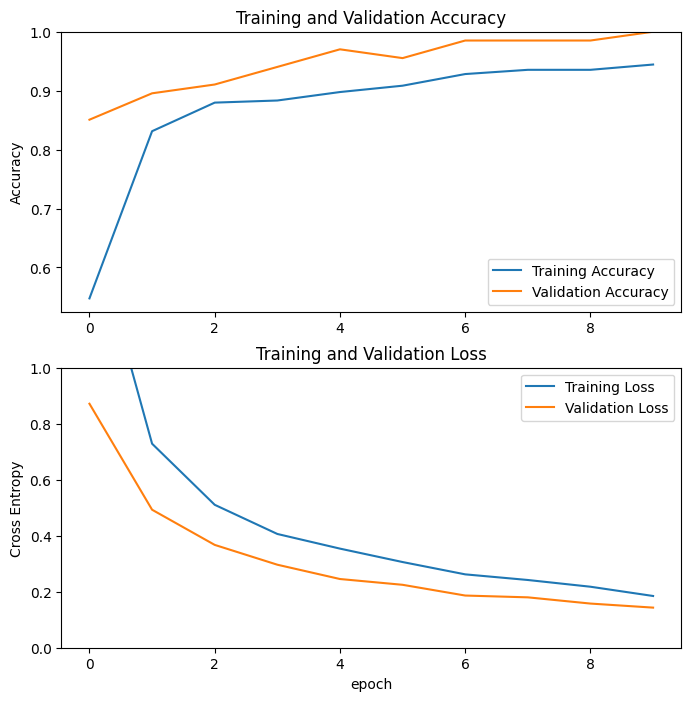

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  475


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb4 (Functional)     │ (None, 5, 5, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        17,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,691,753 (67.49 MB)

 Trainable params: 17,479,786 (66.68 MB)

 Non-trainable params: 211,967 (828.00 KB)

In [ ]:
len(model.trainable_variables)

333

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=len(history.epoch),
                         validation_data=validation_dataset)

Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 332s 13s/step - accuracy: 0.7937 - loss: 0.6609 - val_accuracy: 0.8507 - val_loss: 0.5800
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 219s 12s/step - accuracy: 0.9148 - loss: 0.2671 - val_accuracy: 0.9701 - val_loss: 0.1018
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 261s 11s/step - accuracy: 0.9703 - loss: 0.1369 - val_accuracy: 0.9851 - val_loss: 0.0336
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 263s 12s/step - accuracy: 0.9579 - loss: 0.1115 - val_accuracy: 0.9701 - val_loss: 0.0638
Epoch 15/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 273s 12s/step - accuracy: 0.9783 - loss: 0.0849 - val_accuracy: 0.9701 - val_loss: 0.1564
Epoch 16/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 230s 12s/step - accuracy: 0.9863 - loss: 0.0705 - val_accuracy: 0.9552 - val_loss: 0.1172
Epoch 17/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 263s 12s/step - accuracy: 0.9786 - loss: 0.1064 - val_accuracy: 1.0000 - val_loss: 0.0138
Epoch 18/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 262s 12s/step - accuracy: 0.9827 - loss: 0.0528 - val_accu

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

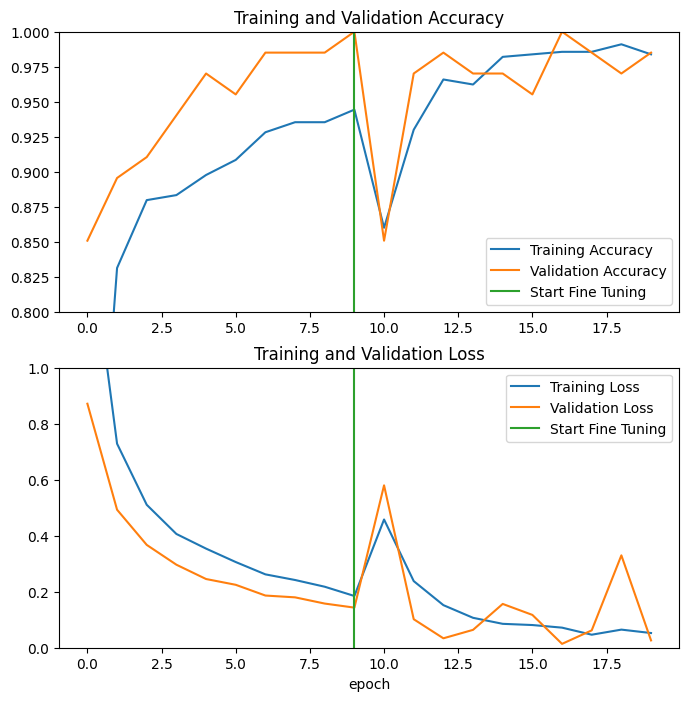

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 1.0000 - loss: 0.0168
Test accuracy : 1.0


Predictions:
 [9 3 1 0 7 8 2 4 7 3 1 5 4 7 2 0 4 9 1 8 7 3 8 3 5 2 8 2 4 2 5 5]
Labels:
 [9 3 1 0 7 8 2 4 7 3 1 5 4 7 2 0 4 9 1 8 7 3 8 3 5 2 8 2 4 2 5 5]


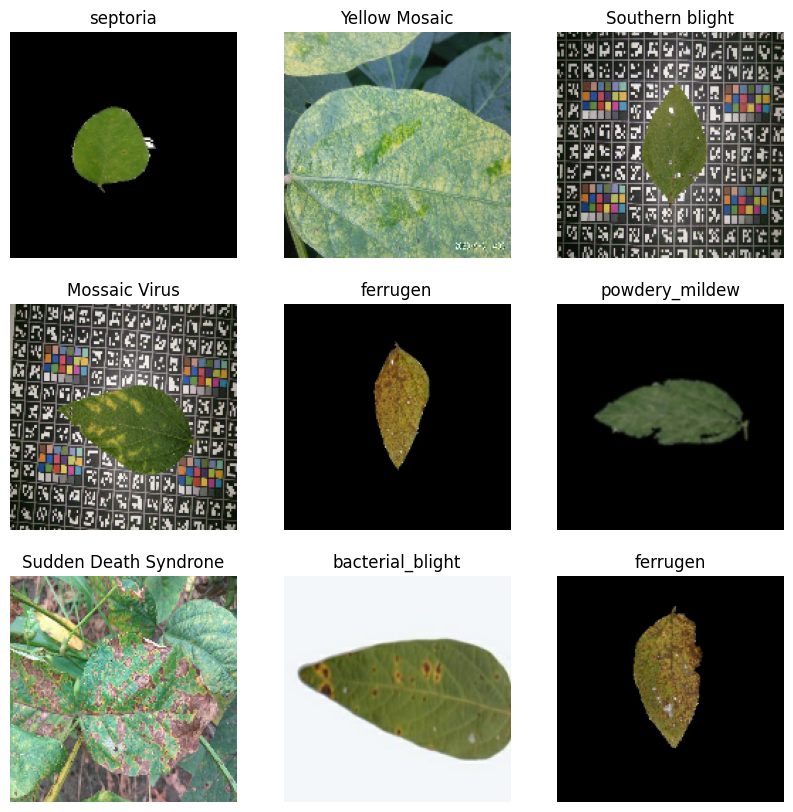

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)
predictions = tf.argmax(predictions,axis=1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [ ]:
model.save("disease.keras")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # change 10 to the number of classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model (🚨 REQUIRED before training)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Load data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [ ]:
train_data = datagen.flow_from_directory(
    "soybean-diseased-leaf-dataset",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 563 images belonging to 10 classes.


In [ ]:
val_data = datagen.flow_from_directory(
    "soybean-diseased-leaf-dataset",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 138 images belonging to 10 classes.


In [ ]:
# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 136s 7s/step - accuracy: 0.3243 - loss: 7.1029 - val_accuracy: 0.6449 - val_loss: 1.2828
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 125s 7s/step - accuracy: 0.7066 - loss: 1.0150 - val_accuracy: 0.7899 - val_loss: 0.6122
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 123s 7s/step - accuracy: 0.8625 - loss: 0.4424 - val_accuracy: 0.8043 - val_loss: 0.5076
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.9513 - loss: 0.1702 - val_accuracy: 0.7826 - val_loss: 0.6547
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 121s 7s/step - accuracy: 0.9673 - loss: 0.1160 - val_accuracy: 0.8986 - val_loss: 0.4714


In [ ]:
# Save model in H5 format
model.save("plant_disease_model.keras")

In [ ]:
!pip install tensorflowjs
!mkdir tfjs_model
!tensorflowjs_converter --input_format keras plant_disease_model.h5 tfjs_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
xarray 2025.9.0 requires packaging>=24.1, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.38.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


2025-10-03 08:03:32.297630: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759478612.575206   22978 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759478612.653346   22978 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759478613.134834   22978 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759478613.134887   22978 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759478613.134892   22978 computation_placer.cc:177] computation placer alr

In [ ]:
import matplotlib.pyplot as plt

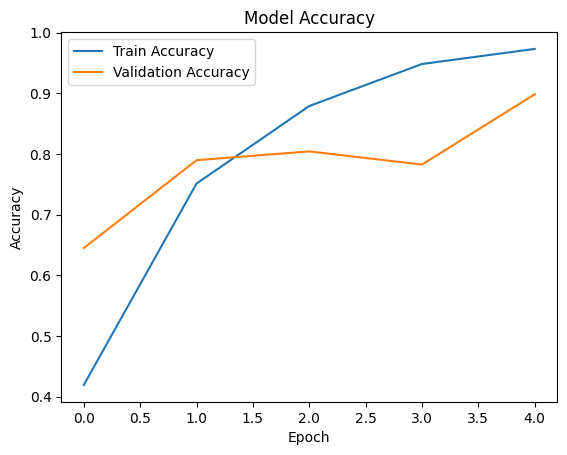

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


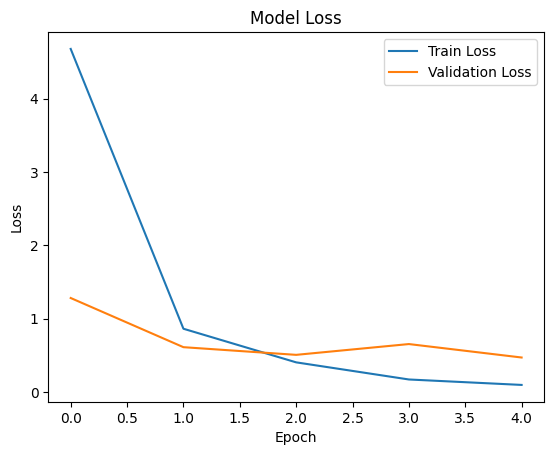

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
img = image.load_img("dataset/test/bacterial_blight/bb (19).jpg", target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [ ]:
# Load your trained model
model = load_model("plant_disease_model.keras")

In [ ]:
# Define the path to test folder
test_dir = "dataset/test"

In [ ]:
# Get class names from folder names (sorted for consistency)
class_names = sorted(os.listdir(test_dir))


In [ ]:
# Loop through each class folder
for class_name in class_names:
    class_path = os.path.join(test_dir, class_name)
    if not os.path.isdir(class_path):
        continue  # skip if it's not a folder

    # Loop through each image in the class folder
    for filename in os.listdir(class_path):
        file_path = os.path.join(class_path, filename)
        if filename.endswith((".jpg", ".jpeg", ".png", ".bmp")):
            try:
                # Load and preprocess image
                img = image.load_img(file_path, target_size=(224, 224))
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0) / 255.0

                # Predict
                prediction = model.predict(img_array)
                predicted_class_index = np.argmax(prediction)
                predicted_class_name = class_names[predicted_class_index]

                print(f"{filename} → Predicted: {predicted_class_name} | Actual: {class_name}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
DSC_0137.jpg → Predicted: Mossaic Virus | Actual: Mossaic Virus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
DSC_0143.jpg → Predicted: Mossaic Virus | Actual: Mossaic Virus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
DSC_0145.jpg → Predicted: Mossaic Virus | Actual: Mossaic Virus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
DSC_0045.jpg → Predicted: Southern blight | Actual: Southern blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
DSC_0059.jpg → Predicted: Southern blight | Actual: Southern blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
DSC_0160.jpg → Predicted: Southern blight | Actual: Southern blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
DSC_0098.jpg → Predicted: Southern blight | Actual: Southern blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
DSC_0104.jpg → Predicted: Southern blight | Actual: Southern blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
DSC_0096.jpg → Predicted: Southern blight | Actual: Southern blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
DSC_0095.jpg → 

In [ ]:
!pip install flask-ngrok flask flask-cors


In [ ]:
# Install ngrok
!pip install pyngrok


In [ ]:
from pyngrok import ngrok

# 🔐 Paste your ngrok authtoken here (only once per session)
ngrok.set_auth_token("30PxCFPoU5SvfXy9LOsSpDhCMu1_4dyKLWzFVpy6Gs1cYD6ap")


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

app = Flask(__name__)
CORS(app)

model = load_model("plant_disease_model.keras")

class_labels = ["Mosaic Virus", "Southern blight", "Sudden Death Syndrome", "Yellow Mosaic",
                "bacterial_blight", "brown_spot", "crestamento", "ferrugen", "powdery_mildew", "septoria"]

@app.route("/predict", methods=["POST"])
def predict():
    try:
        file = request.files["file"]
        img_path = "temp.jpg"
        file.save(img_path)

        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        predictions = model.predict(img_array)
        predicted_class = class_labels[np.argmax(predictions[0])]
        confidence = np.max(predictions[0])

        os.remove(img_path)

        return jsonify({
            "prediction": str(predicted_class),
            "confidence": float(round(confidence * 100, 2))
        })

    except Exception as e:
        print("❌ Backend error:", e)
        return jsonify({"error": str(e)}), 500



# ✅ Start ngrok tunnel manually
public_url = ngrok.connect(5000)
print(f"🚀 Public URL: {public_url}")
app.run(port=5000)


🚀 Public URL: NgrokTunnel: "https://4bab29dee4e0.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


INFO:werkzeug:127.0.0.1 - - [03/Oct/2025 08:07:53] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


INFO:werkzeug:127.0.0.1 - - [03/Oct/2025 08:15:24] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


INFO:werkzeug:127.0.0.1 - - [03/Oct/2025 08:15:42] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


INFO:werkzeug:127.0.0.1 - - [03/Oct/2025 08:17:09] "POST /predict HTTP/1.1" 200 -
